In [ ]:
from shapely.geometry import Polygon
import numpy as np

In [ ]:
import geopandas as gpd
from tobler import area_table, area_extensive, area_intensive

In [ ]:
wards = gdp.fr

## Example: Two GeoDataFrames

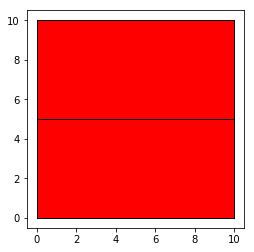

In [34]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (10,0), (10,5), (0,5)]),
                      Polygon([(0,5), (0,10),  (10,10), (10,5)])])

polys2 = gpd.GeoSeries([Polygon([(0,0), (5,0), (5,7), (0,7)]),
                      Polygon([(5,0), (5,10),  (10,10), (10,0)]),
                       Polygon([(0,7), (0,10), (5,10), (5,7)  ])
                       ])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df1['population'] = [ 500,  200]
df1['pci'] = [75, 100]
df1['income'] = df1['population'] * df1['pci']

df2['population'] = [ 500,  100, 200]
df2['pci'] = [75, 80, 100]
df2['income'] = df2['population'] * df2['pci']

ax = df1.plot(color='red', edgecolor='k')

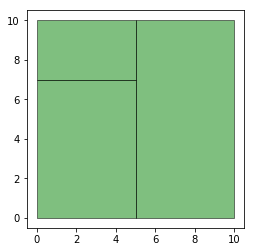

In [35]:
ax = df2.plot(color='green', alpha=0.5, edgecolor='k')

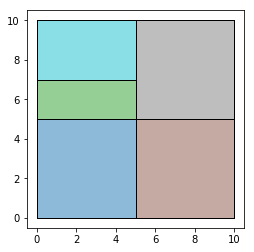

In [36]:
res_union = gpd.overlay(df1, df2, how='union')
ax = res_union.plot(alpha=0.5, cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

## Area Table

In [39]:
area_table(df1, df2)

array([[25., 15., 10.],
       [25.,  0., 25.]])

In [31]:
area_table(df2, df1)

array([[25., 25.],
       [15.,  0.],
       [10., 25.]])

## Allocate From Source DF2 Polygons to Target DF1 Polygons

In [41]:
area_extensive(df2, df1, 'population')

(3, 2) (3,) (3, 2)


array([407.14285714, 392.85714286])

## Allocate From Source DF1 Polygons to Target DF2 Polygons

In [42]:
area_extensive(df1, df2, 'population')

(2, 3) (2,) (2, 3)


array([350., 150., 200.])

## Now for Intensive Variable: PCI (Per-Capita Income)

In [43]:
area_intensive(df2, df1, 'pci')

array([81.5, 87.5])

In [44]:
area_intensive(df1, df2, 'pci')

array([87.5       , 75.        , 92.85714286])

In [45]:
for idx, row in res_union.iterrows():
    print(idx, row)

0 population_1                                    500
pci_1                                            75
income_1                                      37500
population_2                                    500
pci_2                                            75
income_2                                      37500
geometry        POLYGON ((0 0, 0 5, 5 5, 5 0, 0 0))
Name: 0, dtype: object
1 population_1                                    200
pci_1                                           100
income_1                                      20000
population_2                                    500
pci_2                                            75
income_2                                      37500
geometry        POLYGON ((0 5, 0 7, 5 7, 5 5, 0 5))
Name: 1, dtype: object
2 population_1                                      500
pci_1                                              75
income_1                                        37500
population_2                                      100
pci_

In [46]:
res_union

,population_1,pci_1,income_1,population_2,pci_2,income_2,geometry
0,500,75,37500,500,75,37500,"POLYGON ((0 0, 0 5, 5 5, 5 0, 0 0))"
1,200,100,20000,500,75,37500,"POLYGON ((0 5, 0 7, 5 7, 5 5, 0 5))"
2,500,75,37500,100,80,8000,"POLYGON ((5 5, 10 5, 10 0, 5 0, 5 5))"
3,200,100,20000,100,80,8000,"POLYGON ((5 10, 10 10, 10 5, 5 5, 5 10))"
4,200,100,20000,200,100,20000,"POLYGON ((0 7, 0 10, 5 10, 5 7, 0 7))"


In [47]:
df1

,geometry,population,pci,income
0,"POLYGON ((0 0, 10 0, 10 5, 0 5, 0 0))",500,75,37500
1,"POLYGON ((0 5, 0 10, 10 10, 10 5, 0 5))",200,100,20000


In [48]:
df2

,geometry,population,pci,income
0,"POLYGON ((0 0, 5 0, 5 7, 0 7, 0 0))",500,75,37500
1,"POLYGON ((5 0, 5 10, 10 10, 10 0, 5 0))",100,80,8000
2,"POLYGON ((0 7, 0 10, 5 10, 5 7, 0 7))",200,100,20000


In [49]:
area_extensive(df1, res_union, 'population')

(2, 5) (2,) (2, 5)


array([100., 100., 250., 150., 100.])

In [50]:
area_extensive(df2, res_union, 'population')

(3, 5) (3,) (3, 5)


array([ 57.14285714, 250.        , 250.        , 100.        ,
       142.85714286])

In [51]:
area_extensive(df1, res_union, 'population').sum()

(2, 5) (2,) (2, 5)


700.0

In [52]:
area_extensive(df2, res_union, 'population').sum()

(3, 5) (3,) (3, 5)


800.0

In [53]:
area_intensive(df2, res_union, 'pci')

array([100.,  75.,  75.,  80., 100.])

In [54]:
area_intensive(df1, res_union, 'pci')

array([ 75., 100.,  75.,  75., 100.])

In [55]:
#gdf.to_file("result2.shp")

In [56]:
df1.head()

,geometry,population,pci,income
0,"POLYGON ((0 0, 10 0, 10 5, 0 5, 0 0))",500,75,37500
1,"POLYGON ((0 5, 0 10, 10 10, 10 5, 0 5))",200,100,20000


In [57]:
pci2 = area_intensive(df2, res_union, 'pci')

In [58]:
pci1 = area_intensive(df1, res_union, 'pci')

In [59]:
res_union['pci2'] = pci2
res_union['pci1'] = pci1
res_union.to_file("res_union.shp")